<a href="https://colab.research.google.com/github/Tdavies92/AcademyPublic/blob/main/FPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 161812, done.
remote: Counting objects: 100% (40744/40744), done.
remote: Compressing objects: 100% (18491/18491), done.
remote: Total 161812 (delta 20222), reused 38453 (delta 18111), pack-reused 121068
Receiving objects: 100% (161812/161812), 57.38 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (77258/77258), done.
Checking out files: 100% (8343/8343), done.


In [3]:
!ls

Fantasy-Premier-League	sample_data


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import seaborn as sns
import itertools
import scipy.stats as ss
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
df= pd.read_csv('Fantasy-Premier-League/data/2021-22/players_raw.csv')

In [24]:
df.head

<bound method NDFrame.head of      assists  bonus  bps  ... value_season    web_name  yellow_cards
0          0      0   48  ...          0.9        Leno             0
1          0      0    0  ...          0.0   Rúnarsson             0
2          0      0    0  ...          0.0     Willian             0
3          1      7  139  ...          3.9  Aubameyang             1
4          0      0   21  ...          0.2      Cédric             1
..       ...    ...  ...  ...          ...         ...           ...
618        0      0    0  ...          0.0    Campbell             0
619        0      0    0  ...          0.0     Marques             0
620        0      8  134  ...          6.2       Hwang             0
621        0      0    0  ...          0.0     Moulden             0
622        0      0    0  ...          0.0      Storer             0

[623 rows x 67 columns]>

In [23]:
# The random split is used with the sklean library, I decided to have 75% in train and 25% in test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=893717398)

In [30]:
# Let's see if we have duplicated rows:
feature_analyze_duplicates = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']
feature_analyze_duplicates

['form',
 'ict_index',
 'influence',
 'minutes',
 'points_per_game',
 'selected_by_percent',
 'team',
 'threat',
 'total_points',
 'transfers_in',
 'transfers_in_event',
 'assists']

In [31]:
len(train[train.duplicated(subset = feature_analyze_duplicates, keep=False)])
# We see that we have 104 rows that are duplicated, we can decide to keep the first or last.
# Let's create a function that will automatize this process

15

In [32]:
def drop_duplicate_keep_first(database, list_of_features):
  database = database.drop_duplicates(subset= list_of_features, keep='first')
  return database

In [33]:
train = drop_duplicate_keep_first(train, feature_analyze_duplicates)

In [36]:
# Let's see the features distributions in order to see if we have strange / extrem values
continuous_feature_analyze_distribution = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']

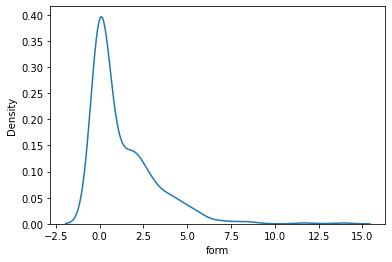

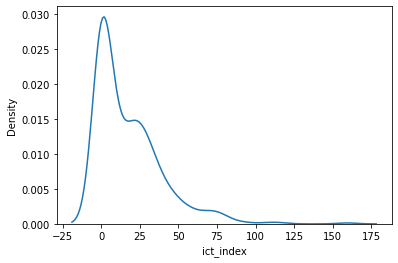

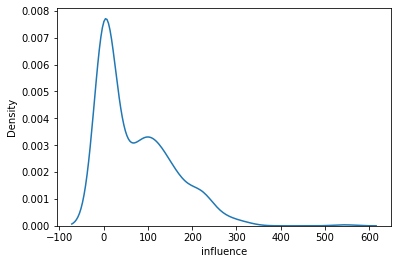

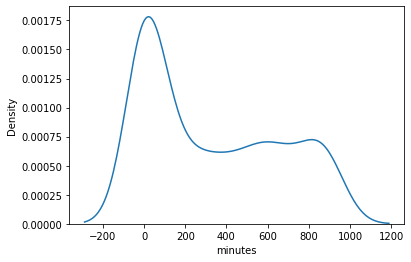

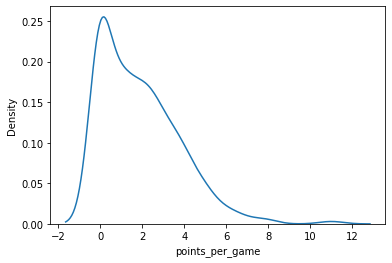

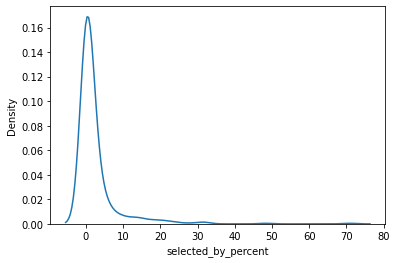

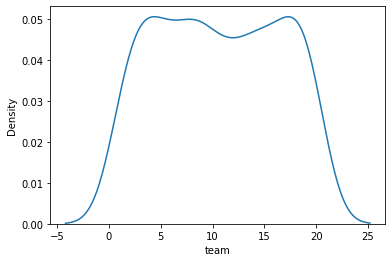

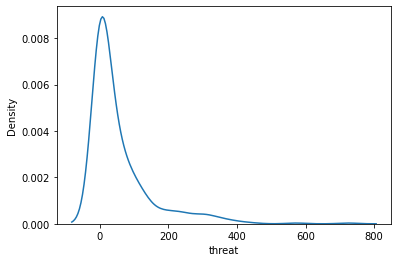

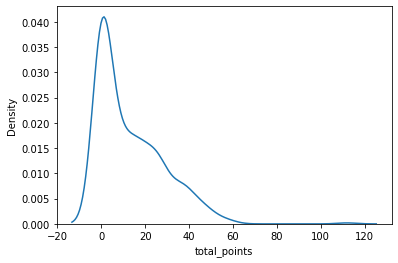

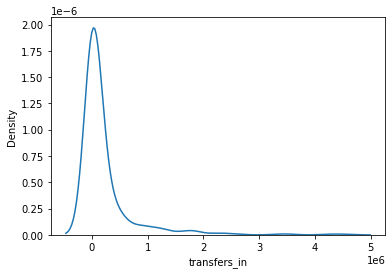

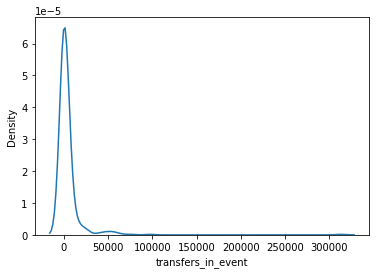

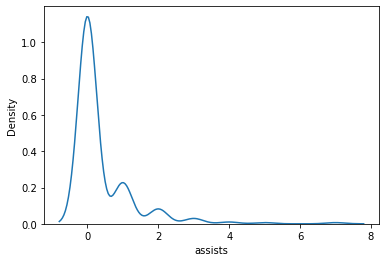

In [37]:
for i, col in enumerate(train[continuous_feature_analyze_distribution]):
  plt.figure(i)
  sns.kdeplot(x=col, data=train)

In [38]:
train.isna().sum()

assists                         0
bonus                           0
bps                             0
chance_of_playing_next_round    0
chance_of_playing_this_round    0
                               ..
transfers_out_event             0
value_form                      0
value_season                    0
web_name                        0
yellow_cards                    0
Length: 67, dtype: int64

In [40]:
feature_analyze_correlation = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']

In [42]:
# Get all the correlations:
corr = train[feature_analyze_correlation].corr()

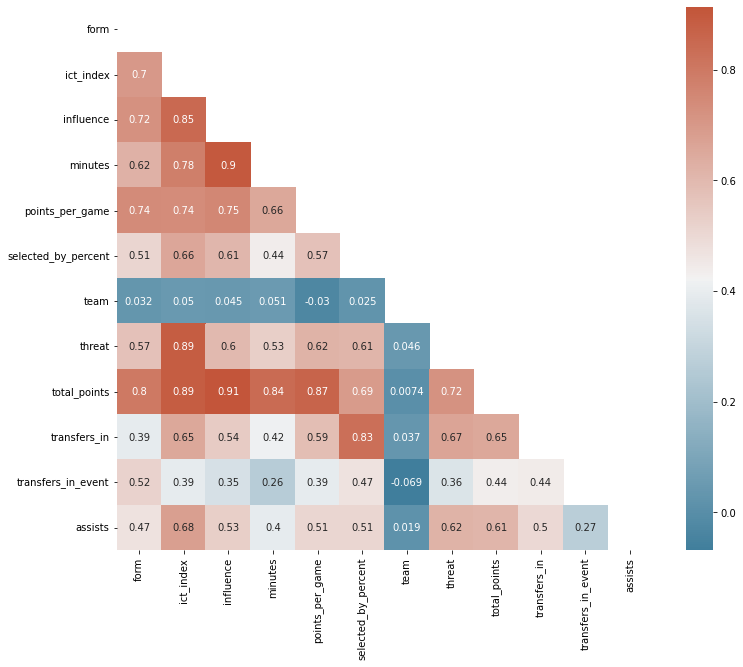

In [43]:
# Set up the matplotlib plot configuration
fig, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)